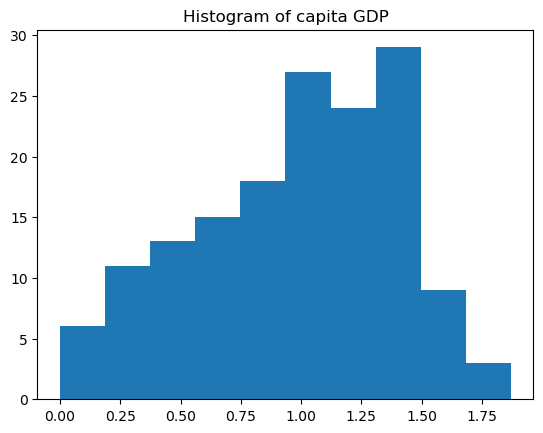

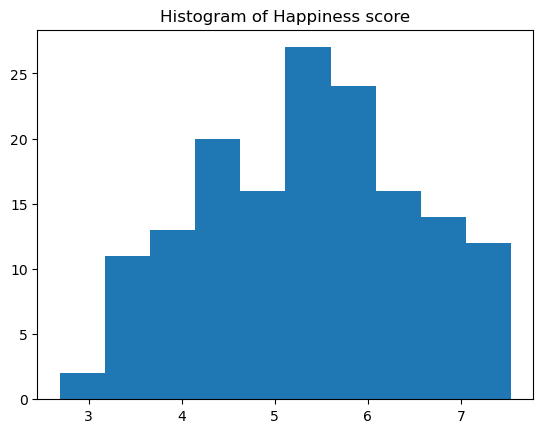

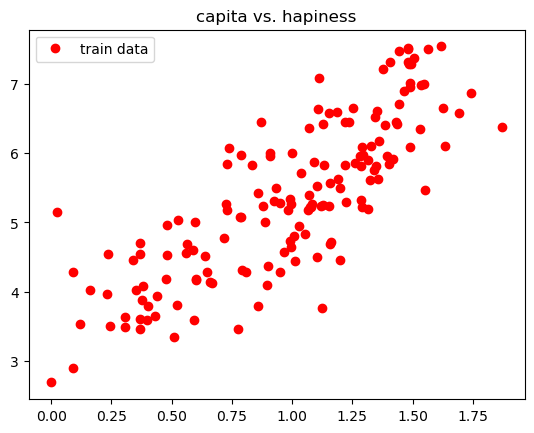

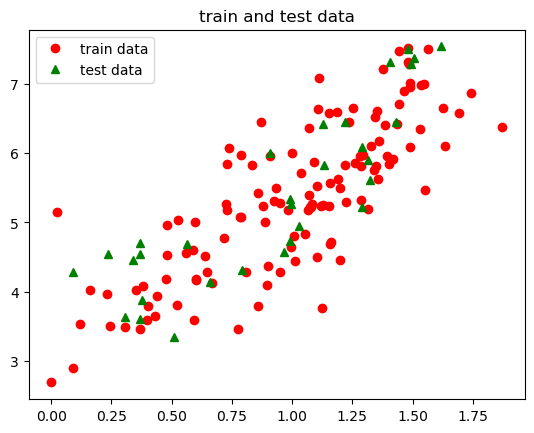

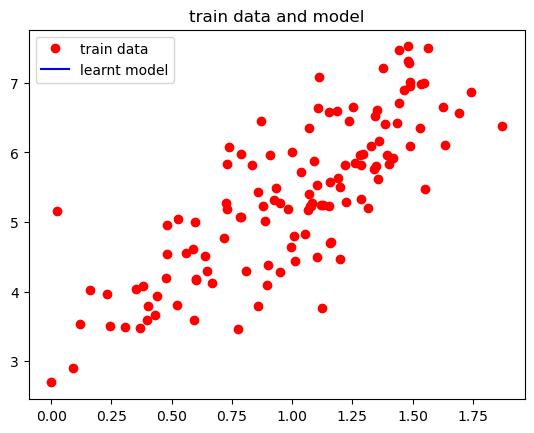

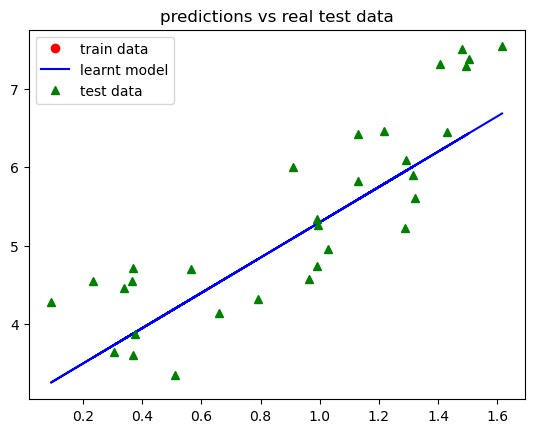

prediction error (tool):  0.43416231934513094


In [2]:
import numpy as np
import csv
from skimage.metrics import mean_squared_error
from sklearn import linear_model
from matplotlib import pyplot as plt

def load_data(file_name, input_var, output_var):
    data = []
    data_name = []
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                data_name = row
            else:
                data.append(row)
            line_count += 1
    selected_input = data_name.index(input_var)
    selected_output = data_name.index(output_var)
    
    inputs_load = [float(data[i][selected_input]) for i in range(len(data))]
    outputs_load = [float(data[i][selected_output]) for i in range(len(data))]
    
    return inputs_load, outputs_load

def plot_histogram(x, var):
    plt.hist(x, 10)
    plt.title('Histogram of ' + var)
    plt.show()


file = '../data/world-happiness-report-2017.csv'
inputs, outputs = load_data(file, 'Economy..GDP.per.Capita.', 'Happiness.Score')


def plot_data(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if x2:
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if x3:
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()

    
plot_histogram(inputs, 'capita GDP')
plot_histogram(outputs, 'Happiness score')

plot_data(inputs, outputs, [], [], [], [], 'capita vs. hapiness')

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
    
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]
trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

plot_data(trainInputs, trainOutputs, [], [], testInputs, testOutputs, "train and test data")

xx = [[el] for el in trainInputs]

# simulare comportmaent 
regressor = linear_model.SGDRegressor(max_iter=1000, average=True, learning_rate='constant', eta0=0.01, tol=1e-6, shuffle=False,early_stopping=False)
regressor.fit(xx, trainOutputs)

w0, w1 = regressor.intercept_, regressor.coef_[0]
    
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints): xref.append(val) 
val += step

yref = [w0 + w1 * el for el in xref] 
plot_data(trainInputs, trainOutputs, xref, yref, [], [], title = "train data and model")
    
  
computedTestOutputs = regressor.predict([[x] for x in testInputs])
    
plot_data([], [], testInputs, computedTestOutputs, testInputs, testOutputs, "predictions vs real test data")


error = mean_squared_error(np.array(testOutputs), np.array(computedTestOutputs))
print("prediction error (tool): ", error)

